# Car accident

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import chardet
import datetime
import os
from tueplots import bundles
from tueplots.constants.color import rgb
import sklearn as sk
from sklearn.decomposition import PCA
import seaborn as sns
import dload
import geopandas

plt.rcParams.update(bundles.beamer_moml())
plt.rcParams.update({"figure.dpi": 200})

if not os.path.exists('Graphen'):
    os.mkdir('Graphen')
if not os.path.exists('Daten'):
    os.mkdir('Daten')

In [2]:
#dload.save_unzip('https://static.nhtsa.gov/nhtsa/downloads/FARS/2020/National/FARS2020NationalCSV.zip')
try:
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding='WINDOWS-1252')
except:
    with open('FARS2021NationalCSV/accident.csv', 'rb') as f:
        result = chardet.detect(f.read())  # or readline if the file is large
    accidents = pd.read_csv('FARS2021NationalCSV/accident.csv',encoding=result)
    print(result)
accidents['date'] = pd.to_datetime(accidents[['YEAR','MONTH','DAY']])


US_state_shape = geopandas.read_file('Daten/States shape data/cb_2018_us_state_500k.shp')
US_state_shape['STATENAME'] = US_state_shape['NAME']
print(US_state_shape.head())

save_US = US_state_shape.copy()


Cannot find header.dxf (GDAL_DATA is not defined)


  STATEFP   STATENS     AFFGEOID GEOID STUSPS            NAME LSAD  \
0      28  01779790  0400000US28    28     MS     Mississippi   00   
1      37  01027616  0400000US37    37     NC  North Carolina   00   
2      40  01102857  0400000US40    40     OK        Oklahoma   00   
3      51  01779803  0400000US51    51     VA        Virginia   00   
4      54  01779805  0400000US54    54     WV   West Virginia   00   

          ALAND       AWATER  \
0  121533519481   3926919758   
1  125923656064  13466071395   
2  177662925723   3374587997   
3  102257717110   8528531774   
4   62266474513    489028543   

                                            geometry       STATENAME  
0  MULTIPOLYGON (((-88.50297 30.21523, -88.49176 ...     Mississippi  
1  MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...  North Carolina  
2  POLYGON ((-103.00257 36.52659, -103.00219 36.6...        Oklahoma  
3  MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...        Virginia  
4  POLYGON ((-82.64320 38.16909

In [3]:

accidents_state = accidents.value_counts('STATENAME',sort=False).to_frame().reset_index()
#accidents_state['CASES'] = accidents_state.iloc[:,-1]
#del accidents_state[0]
accidents_state = accidents_state.rename(columns={accidents_state.columns[-1]:'CASES'})

print(accidents_state)


#accidents_state['STATENAME'] = accidents['STATENAME'].unique()
accidents_state['Population'] = Google_daten.groupby('subregion1_name').first()['population'][accidents['STATENAME'].unique()].to_numpy()

temp = Google_daten.groupby('STATENAME').first().loc[:,['population_density','area']].reset_index()
print(temp.head())
print(accidents_state.columns)
accidents_state = pd.merge(accidents_state,temp,on=['STATENAME'],how='left')

#accidents_state['STATENAME'] = accidents['STATENAME'].unique()
accidents_state['Population'] = Google_daten.groupby('subregion1_name').first()['population'][accidents['STATENAME'].unique()].to_numpy()
#merge population
temp = Google_daten[Google_daten['date']>'2021'].groupby('STATENAME').first().loc[:,'population_age_00_09':'population_age_80_and_older'].reset_index()
accidents_state = pd.merge(accidents_state.reset_index(),temp[temp['STATENAME'].isin(accidents['STATENAME'].unique())],on=['STATENAME'])
# merge rainy/snowy days
temp = Google_daten[Google_daten['date']>'2021'][['STATENAME']+weather_stat].groupby('STATENAME').sum().loc[:,'rainy_day':'around_4_degree'].reset_index()
accidents_state = pd.merge(accidents_state.reset_index(),temp[temp['STATENAME'].isin(accidents['STATENAME'].unique())],on=['STATENAME'])
print(accidents_state)
# cases on certain weather:
for i in accidents['WEATHERNAME'].unique():
    temp = accidents[accidents['WEATHERNAME'] == i].value_counts('STATENAME',sort=False).to_frame().reset_index()
    temp = temp.rename(columns={temp.columns[-1]:'CASES_'+i})
    #temp['CASES_'+i] = temp['count']
    #del temp['count']
    accidents_state = pd.merge(accidents_state,temp,on=['STATENAME'],how='left')
    accidents_state['CASES_'+i] = accidents_state['CASES_'+i].fillna(0)


print(accidents_state.head())
print(Google_daten[Google_daten['date']>'2021'].groupby('STATENAME').first().loc[:,'population_age_00_09':'population_age_80_and_older'])

accidents_state['POPULATION_2021'] = people[people['CTYNAME'].isin(people['STNAME'])].groupby('STATE').first()['POPESTIMATE2021']
accidents_state['CASES_NORM'] = accidents_state['CASES']/accidents_state['Population']
accidents_state['CASES/100000'] = accidents_state['CASES_NORM']*100000

Google_daten['CASES/100000'] = Google_daten['CASES']/Google_daten['population']*100000

print(accidents_state)

               STATENAME  CASES
0                Alabama    885
1                 Alaska     59
2                Arizona   1063
3               Arkansas    631
4             California   3983
5               Colorado    638
6            Connecticut    283
7               Delaware    132
8   District of Columbia     40
9                Florida   3451
10               Georgia   1670
11                Hawaii     94
12                 Idaho    244
13              Illinois   1210
14               Indiana    863
15                  Iowa    329
16                Kansas    381
17              Kentucky    734
18             Louisiana    887
19                 Maine    135
20              Maryland    522
21         Massachusetts    397
22              Michigan   1072
23             Minnesota    451
24           Mississippi    697
25              Missouri    931
26               Montana    222
27              Nebraska    192
28                Nevada    360
29         New Hampshire    106
30      

NameError: name 'Google_daten' is not defined

In [72]:
states = [210531,36009,146465,210729,396540,185486,45916,14069,3445,275376,272662,9799,107568,306658,202707,235549,286606,166971,134115,46736,71129,77730,256579,290618,162088,	277504,150446,193996,100805,33391,85108,150216,240489,229011,178845,262492,238754,162101,251708,12664,166594,166635,203850,683533,102031,29273,164132,167632,80167,239318,62620]
state_pop = pd.read_csv('Daten/population.csv')
state_pop = state_pop.iloc[14:]
state_pop = state_pop.iloc[:-1]
col = state_pop.columns.values
col = np.delete(col,[4,7])
state_pop = state_pop.drop(col,axis=1)
pop_val = state_pop['POPESTIMATE2021'].values
statenames = state_pop['NAME'].values
counts = []
for x in statenames:
    counts.append(accidents['STATENAME'].value_counts()[x])

    
state_pop.insert(2,'Accidents/State',counts,True)
state_pop.insert(3,'Lane Miles',states,True)
res = np.array(counts) / ( states * pop_val )
b = np.sort(res)
state_pop.insert(4,'AccidentsPerCapitaPerLaneMile',res,True)
state_pop.rename(columns = {'NAME':'STATENAME'}, inplace = True) 

## Geo Plot


In [128]:
US_state_shape = save_US.copy()
US_state_shape = geopandas.GeoDataFrame(pd.merge(US_state_shape,state_pop, on=['STATENAME']))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

(20.0, 73.98790205)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

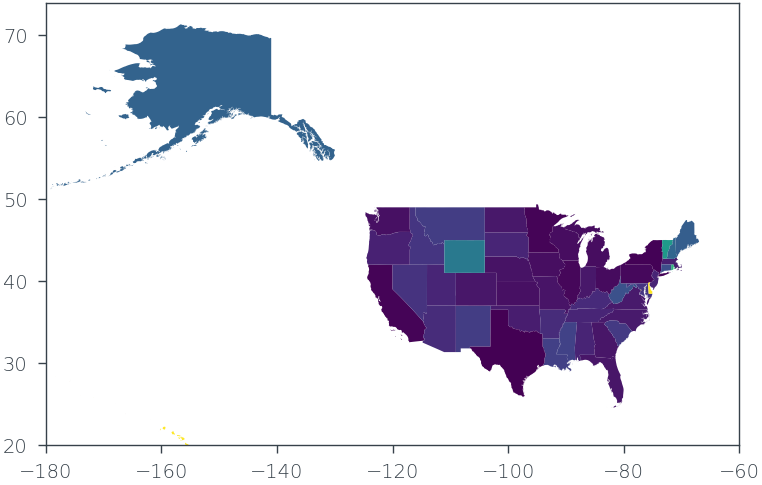

In [138]:
US_state_shape.plot(column='AccidentsPerCapitaPerLaneMile',vmin=b[0],vmax=b[-3])
plt.xlim(-180,-60)
plt.ylim(20,None)

In [ ]:
### Pie plot ###
